In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from utils import *
from regressor import *
import pysindy as ps
from numpy import diff

We use forward difference to handle finite differences with a non-uniform grid/array
- Since our data aren't evenly sampled, central difference approach cannot be used.

[[-0.471422   -0.00935615  0.00871996]
 [-1.37387384 -2.5256759  -2.30620903]]
['x0' 'x1' 'x0^2']


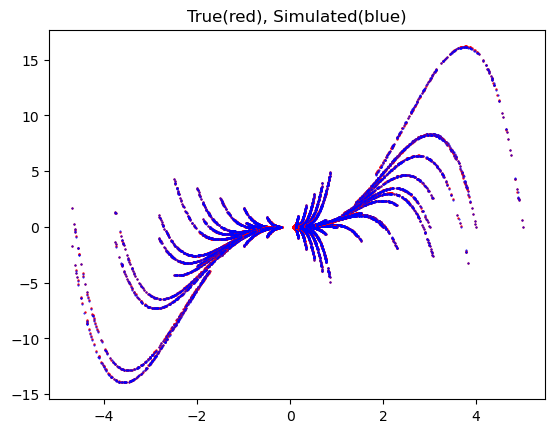

[[-4.96028053e-01  0.00000000e+00  1.60634119e-03]
 [ 7.85049893e+00 -1.02801451e+01 -1.58890545e+00]]
['x0' 'x1' 'x1^2']


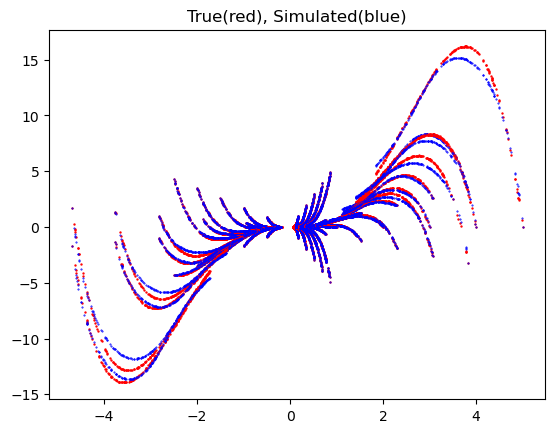

[[-0.47827607 -0.01058409 -0.00214622]
 [ 0.         -2.02808377  0.61707932]]
['x0' 'x1' 'x0^3']


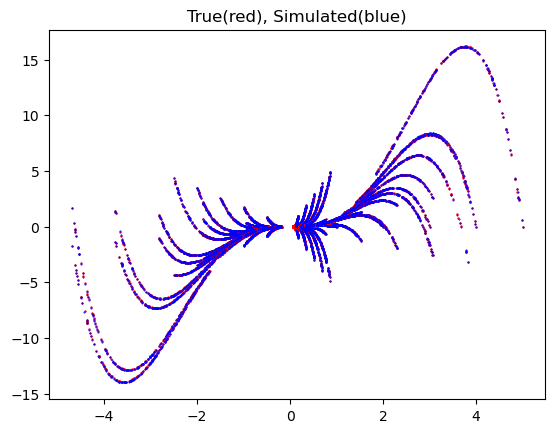

[[-4.97415979e-01  0.00000000e+00 -4.22867454e-04]
 [ 7.56358551e+00 -8.11980146e+00  3.08893786e-01]]
['x0' 'x1' 'x1^3']


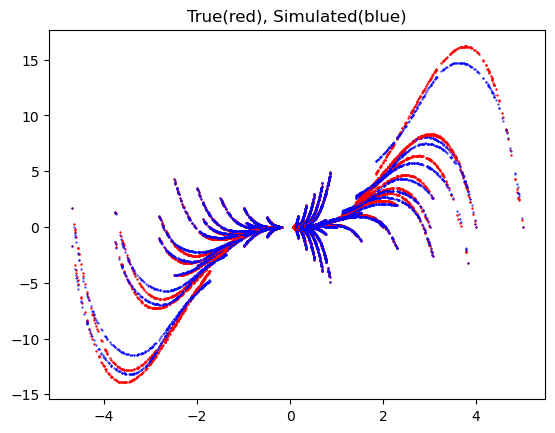

[[-0.471422   -0.00935615  0.00871996  0.        ]
 [-1.02843928 -2.83848333 -2.22350949 -0.06570603]]
['x0' 'x1' 'x0^2' 'x1^2']


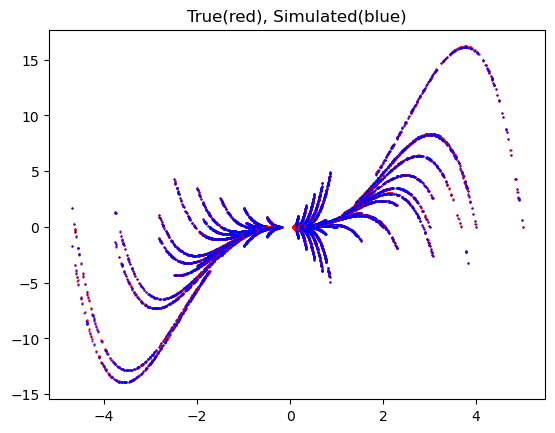

[[-0.471422   -0.00935615  0.00871996  0.        ]
 [ 0.         -2.02808377  0.          0.61707932]]
['x0' 'x1' 'x0^2' 'x0^3']


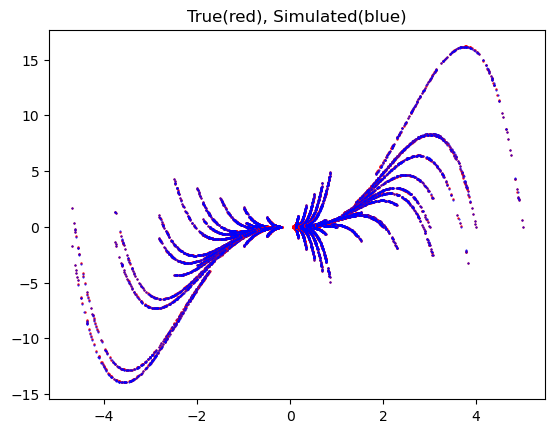

[[-4.68944792e-01 -1.11235733e-02  9.31049649e-03  1.04251883e-04]
 [-1.00135436e+00 -2.79146020e+00 -2.21740463e+00  1.56774035e-02]]
['x0' 'x1' 'x0^2' 'x1^3']


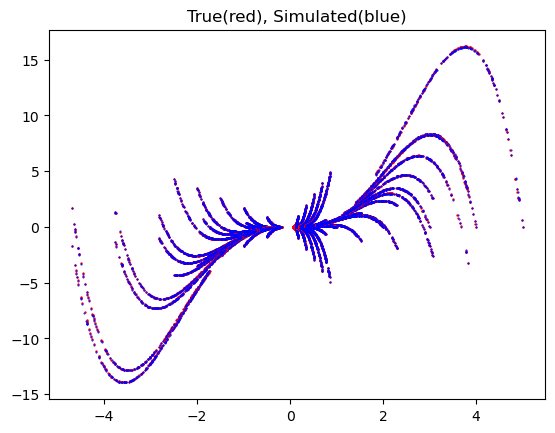

[[-4.78276073e-01 -1.05840881e-02  0.00000000e+00 -2.14622086e-03]
 [ 0.00000000e+00 -2.02404622e+00  1.51201357e-03  6.17079934e-01]]
['x0' 'x1' 'x1^2' 'x0^3']


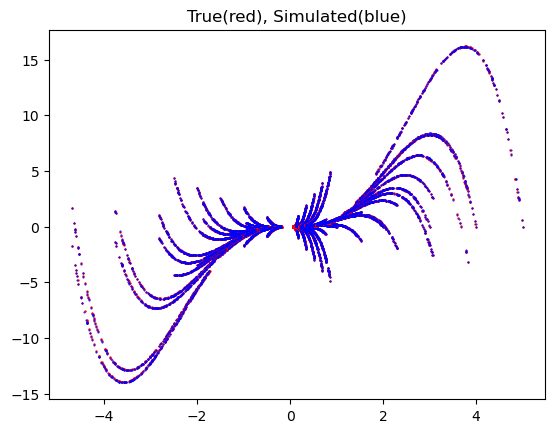

[[-4.96028053e-01  0.00000000e+00  1.60634119e-03  0.00000000e+00]
 [ 8.04036461e+00 -1.36727953e+01 -4.54823397e+00 -6.23817325e-01]]
['x0' 'x1' 'x1^2' 'x1^3']


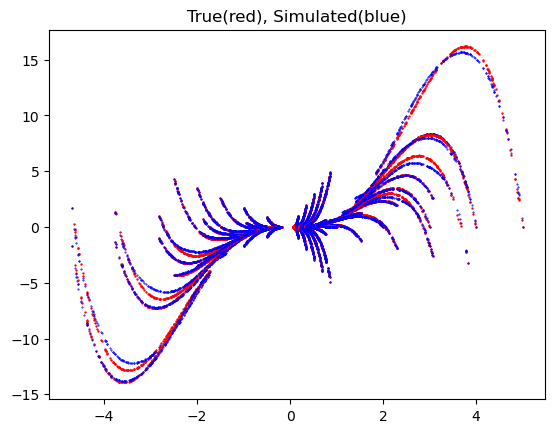

[[-4.78276073e-01 -1.05840881e-02 -2.14622086e-03  0.00000000e+00]
 [ 0.00000000e+00 -2.02667835e+00  6.17078229e-01 -1.87573809e-04]]
['x0' 'x1' 'x0^3' 'x1^3']


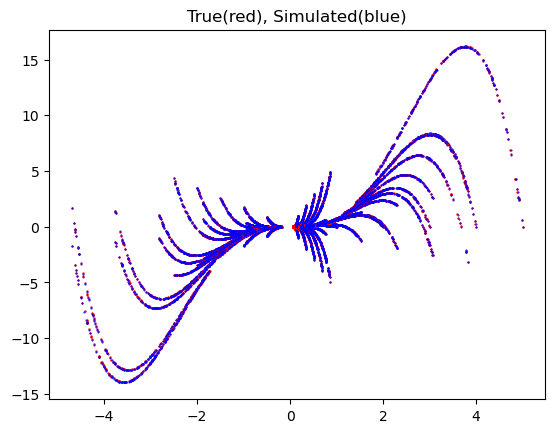

[[-4.71421999e-01 -9.35614925e-03  8.71995789e-03  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -2.02404622e+00  0.00000000e+00  1.51201357e-03
   6.17079934e-01]]
['x0' 'x1' 'x0^2' 'x1^2' 'x0^3']


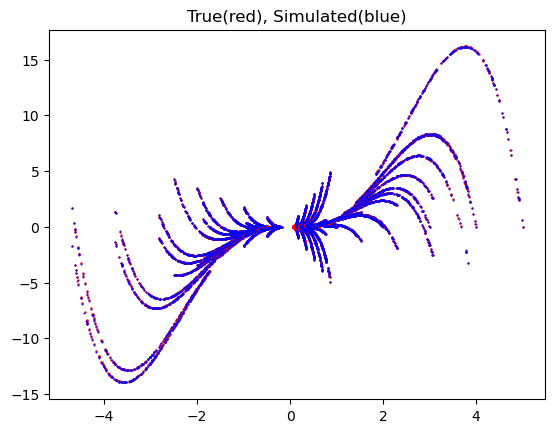

[[-4.68944817e-01 -1.11235570e-02  9.31049028e-03  0.00000000e+00
   1.04251017e-04]
 [-1.64113260e+00 -2.06182583e+00 -2.37233405e+00  2.81535653e-01
   5.23511290e-02]]
['x0' 'x1' 'x0^2' 'x1^2' 'x1^3']


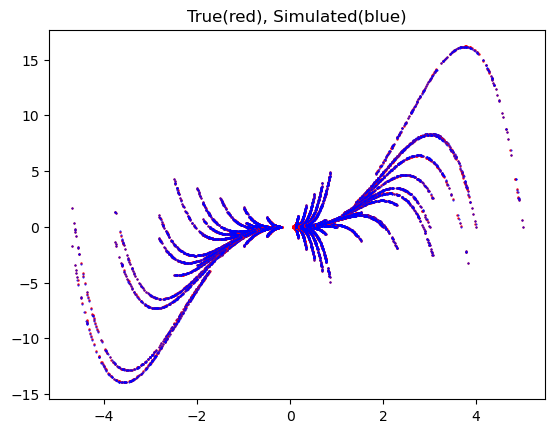

[[-4.68944792e-01 -1.11235732e-02  9.31049645e-03  0.00000000e+00
   1.04251879e-04]
 [ 0.00000000e+00 -2.02667835e+00  0.00000000e+00  6.17078229e-01
  -1.87573809e-04]]
['x0' 'x1' 'x0^2' 'x0^3' 'x1^3']


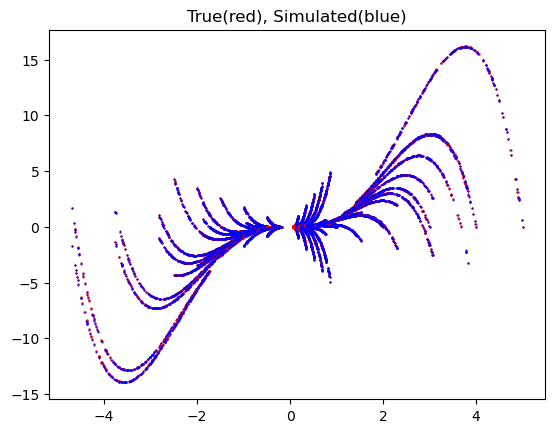

[[-4.78276073e-01 -1.05840881e-02  0.00000000e+00 -2.14622086e-03
   0.00000000e+00]
 [ 0.00000000e+00 -2.02404622e+00  1.51201357e-03  6.17079934e-01
   0.00000000e+00]]
['x0' 'x1' 'x1^2' 'x0^3' 'x1^3']


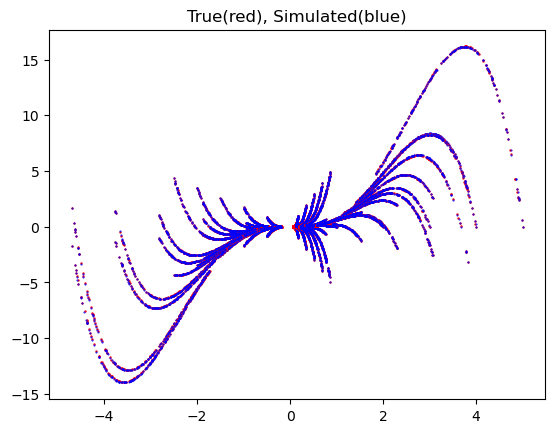

[[-4.68944820e-01 -1.11235553e-02  9.31048964e-03  0.00000000e+00
   0.00000000e+00  1.04250928e-04]
 [ 0.00000000e+00 -2.02404622e+00  0.00000000e+00  1.51201357e-03
   6.17079934e-01  0.00000000e+00]]
['x0' 'x1' 'x0^2' 'x1^2' 'x0^3' 'x1^3']


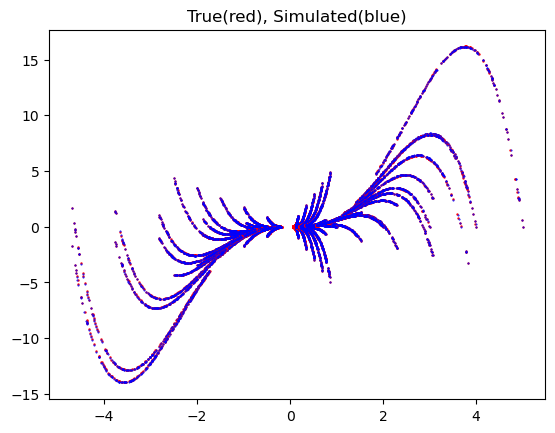

[[-4.78276073e-01 -1.05840881e-02 -2.14622086e-03  0.00000000e+00]
 [ 0.00000000e+00 -2.02667835e+00  6.17078229e-01 -1.87573809e-04]]
[['x0' 'x1' 'x0^3' 'x1^3']]
Best RMSE: 0.008670656329308175


In [45]:
best_rms = 10**8 # Very large RMSE
best_avg_rms = 10**8 # Very large RMSE

poly = PolynomialFeatures(3, include_bias=False) # 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3'
for L in range(1, 5):
    for subset in itertools.combinations([2,4,5,8], L):
        rmse_list = []
        subset = [0,1] + list(subset) # Always include the state itself

        data_list = os.listdir("./data/koopman1/")
        for file in data_list:
            temp_data = pd.read_csv(os.path.join("./data/koopman1/",file))# t as state
            time_d = [diff(temp_data['x'])/diff(temp_data['t']), diff(temp_data['y'])/diff(temp_data['t'])]
            simul_time = temp_data['t'].values
            
            temp_data = temp_data.values[:,1:]
            
            data_truncated = temp_data[1:,:] # 1:-1 -> 1: (Because now we are using foward difference method)
            data_diff = np.array(time_d).T
            data_augmented = poly.fit_transform(data_truncated)

            data_subset = data_augmented[:,subset]

            initial_theta = np.full(shape=(len(subset),1),fill_value=0.002) # inital coefficient is very important.
            coef_list = []
            for col in range(0,data_diff.shape[1]):
                coef = coordinate_descent_lasso(initial_theta, data_subset, data_diff[:,col].reshape(-1,1), 2, 4000, False)
                coef_list.append(coef)
            
            coef = np.array(coef_list)
            
            init_cond = temp_data[0,:].reshape(1,2)
            current_state = init_cond
            sim = [current_state]
            dynamics = func_generator(coef, poly, subset)
            
            for iter in range(0,len(simul_time)-1):
                next_state = integrator_RK4(dynamics, simul_time[iter+1] - simul_time[iter], iter, current_state)
                sim.append(next_state)
                current_state = next_state
            
            plt.scatter(x=temp_data[:,0],y=temp_data[:,1],label='true',s=0.5,color='red')
            
            # Keep the best model for each observable set but will be saved when we verify the average RMSE for all initial conditions.
            sim = np.array(sim).reshape(temp_data.shape[0],2)
            plt.scatter(x=sim[:,0],y=sim[:,1],label='simul',s=0.2,color='blue')

            rms = mean_squared_error(temp_data, sim, squared=False)
            rmse_list.append(rms)
            if rms <= best_rms:
                candidate_model = coef
        
        print(coef)
        print(poly.get_feature_names_out()[subset])
        avg_rms = np.average(np.array(rmse_list))
        if avg_rms <= best_avg_rms:
            best_avg_rms = avg_rms
            best_observables = subset
            best_model = candidate_model
        plt.title('True(red), Simulated(blue)')
        plt.show()

print(best_model)
print(poly.get_feature_names_out()[[best_observables]])
print(f'Best RMSE: {best_avg_rms}')



Reconstructed ODE for koopman1.pyc

- Regularization parameter : $0.5$
\begin{align*}
\dot{x}_{0} &= -0.500 x_{0} \\
\dot{x}_{1} &= -0.654 x_{0} - 1.829 x_{1} - 0.695 {x_{0}}^{2} + 0.148 {x_{1}}^{2} + 0.450 {x_{0}}^{3} + 0.0225 {x_{1}}^{3}
\end{align*}
Best Avg. RMSE: 0.004237

- Regularization parameter : $1$
\begin{align*}
\dot{x}_{0} &= -0.486 x_{0} \\
\dot{x}_{1} &= -0.142 x_{0} - 2.121 x_{1} - 0.276 {x_{0}}^{2} + 0.542 {x_{0}}^{3}
\end{align*}
Best Avg. RMSE: 0.00578

- Regularization parameter : $2$
\begin{align*}
\dot{x}_{0} &= -0.478 x_{0} \\
\dot{x}_{1} &= - 2.026 x_{1} + 0.617 {x_{0}}^{3}
\end{align*}
Best Avg. RMSE: 0.00867